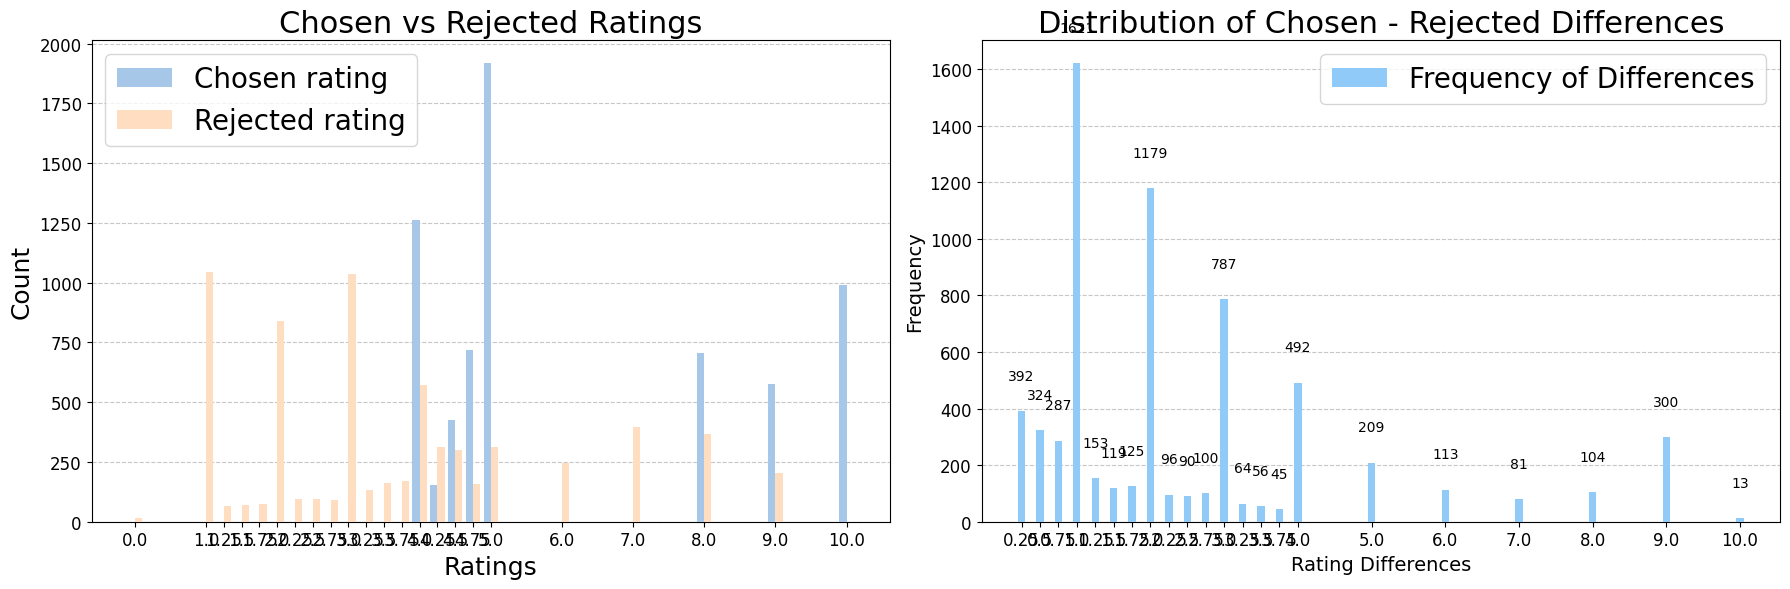

In [5]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import FuncFormatter
from datasets import load_dataset

dataset = load_dataset("argilla/dpo-mix-7k")['train']
chosen_rating = dataset['chosen_rating']
rejected_rating = dataset['rejected_rating']


# ====== 图1数据处理 ======
# 统计标签频次
label_counts_chosen = Counter(chosen_rating)
label_counts_rejected = Counter(rejected_rating)

# 提取标签和频次
labels = sorted(set(label_counts_chosen.keys()).union(set(label_counts_rejected.keys())))
counts_chosen = [label_counts_chosen[label] for label in labels]
counts_rejected = [label_counts_rejected[label] for label in labels]

# ====== 图2数据处理 ======
# 计算差值列表
rating_difference = [chosen - rejected for chosen, rejected in zip(chosen_rating, rejected_rating)]

# 统计差值频次
diff_counts = Counter(rating_difference)

# 提取差值标签和频次
diff_labels = sorted(diff_counts.keys())
diff_counts_values = [diff_counts[label] for label in diff_labels]

# ====== 绘制子图 ======
fig, axs = plt.subplots(1, 2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})

# ====== 子图1：Chosen vs Rejected ======
bar_width = 0.1
axs[0].bar(labels, counts_chosen, bar_width, label='Chosen rating', color='#A7C7E9', zorder=3)
axs[0].bar([x + bar_width for x in labels], counts_rejected, bar_width, label='Rejected rating', color='#FFDDC1', zorder=3)

# 添加柱子顶部数值
# for i, yval in enumerate(counts_chosen):
#     axs[0].text(labels[i], yval + 500, str(yval), ha='center', va='bottom', fontsize=10)
# for i, yval in enumerate(counts_rejected):
#     axs[0].text(labels[i] + bar_width, yval + 500, str(yval), ha='center', va='bottom', fontsize=10)

# 设置子图1标题和标签
axs[0].set_title('Chosen vs Rejected Ratings', fontsize=22)
axs[0].set_xlabel('Ratings', fontsize=18)
axs[0].set_ylabel('Count', fontsize=18)
axs[0].set_xticks([x + bar_width / 2 for x in labels])  # 居中对齐两个柱子
axs[0].set_xticklabels(labels, fontsize=12)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)
axs[0].legend(loc='upper left', fontsize=20)
axs[0].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# ====== 子图2：Difference Distribution ======
bars_diff = axs[1].bar(diff_labels, diff_counts_values, bar_width, label='Frequency of Differences', color='#90CAF9', zorder=3)

# 添加柱子顶部数值
for i, yval in enumerate(diff_counts_values):
    axs[1].text(diff_labels[i], yval + 100, str(yval), ha='center', va='bottom', fontsize=10)

# 设置子图2标题和标签
axs[1].set_title('Distribution of Chosen - Rejected Differences', fontsize=22)
axs[1].set_xlabel('Rating Differences', fontsize=14)
axs[1].set_ylabel('Frequency', fontsize=14)
axs[1].set_xticks(diff_labels)
axs[1].set_xticklabels(diff_labels, fontsize=12)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)
axs[1].legend(loc='upper right', fontsize=20)
axs[1].grid(axis='y', linestyle='--', alpha=0.7, zorder=1)

# ====== 调整整体布局 ======
plt.tight_layout()
plt.show()
